# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def FileImport (nomefile=None, data_array=None, i=None):
    with open(nomefile) as fileinput:
        f=open(nomefile, 'r')
        lines=f.readlines()
        for x in lines:
            data_array.append(float(x.split()[i]))
        f.close()

# <span style="color:red">  Exercise 10.1 </span>

# Simulated Annealing

In this exercise I resolved a Traveling Salesman Problem (TSP) using a simulated annealing algorithm (SA).

Parameters (except of temperatures and number of generations), cities configurations and the central code for this simulation are the same of the Ex.9.

I used 22 scaling decreasing fictitious temperatures $T$, starting from $T=25$ and scaling by a $1.1$ factor. The number of steps at the same $T$ indeed increases at the decreasing of the temperature.

Below a picture of $L^{(1)}$ of the best path as a function of the iterations/generations of the algorithms GA and SA, for both the world configurations:

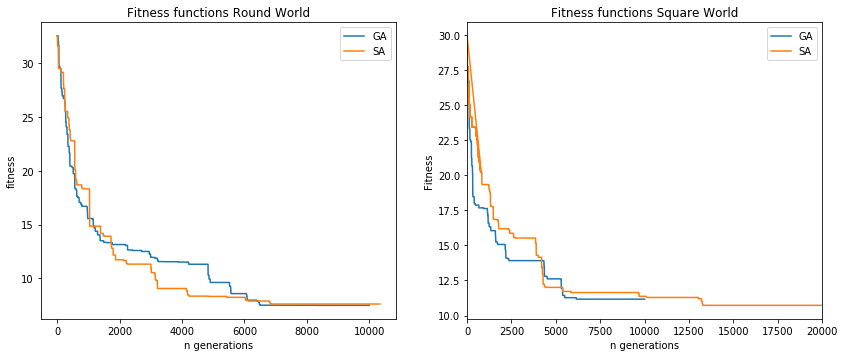

In [27]:
round_fitness_best_GA, round_ngen_GA = [], []
round_fitness_best_SA, round_ngen_SA = [], []
square_fitness_best_GA, square_ngen_GA = [], []
square_fitness_best_SA, square_ngen_SA = [], []

FileImport("../Es10/10.1/fitness_mean_round_GA.out", round_ngen_GA, 0)
FileImport("../Es10/10.1/fitness_mean_round_GA.out", round_fitness_best_GA, 2)
FileImport("../Es10/10.1/fitness_mean_round_SA.out", round_ngen_SA, 0)
FileImport("../Es10/10.1/fitness_mean_round_SA.out", round_fitness_best_SA, 2)

FileImport("../Es10/10.1/fitness_mean_square_GA.out", square_ngen_GA, 0)
FileImport("../Es10/10.1/fitness_mean_square_GA.out", square_fitness_best_GA, 2)
FileImport("../Es10/10.1/fitness_mean_square_SA.out", square_ngen_SA, 0)
FileImport("../Es10/10.1/fitness_mean_square_SA.out", square_fitness_best_SA, 2)


fig=plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.plot(round_ngen_GA, round_fitness_best_GA, label="GA")
plt.plot(round_ngen_SA, round_fitness_best_SA, label="SA")
plt.title("Fitness functions Round World")
plt.xlabel('n generations')
plt.ylabel('fitness')
plt.legend()

plt.subplot(2,2,2)
plt.plot(square_ngen_GA, square_fitness_best_GA, label="GA")
plt.plot(square_ngen_SA, square_fitness_best_SA, label="SA")
plt.title("Fitness functions Square World")
plt.xlim(0,20000)
plt.xlabel('n generations')
plt.ylabel('Fitness')
plt.legend()

plt.show()

As we can see in the pictures both GA and Sa reach a minimum for the fitness function. In the Round World the minimum is the same for both the algorithms but SA converges start to decrease earlier. In the square world the minimum of the fitness with the SA is less than the GA, but the algorithm needs almost double the generations to reach its minimum.

Reported below also a picture of the best path for both the worlds cofigurations:

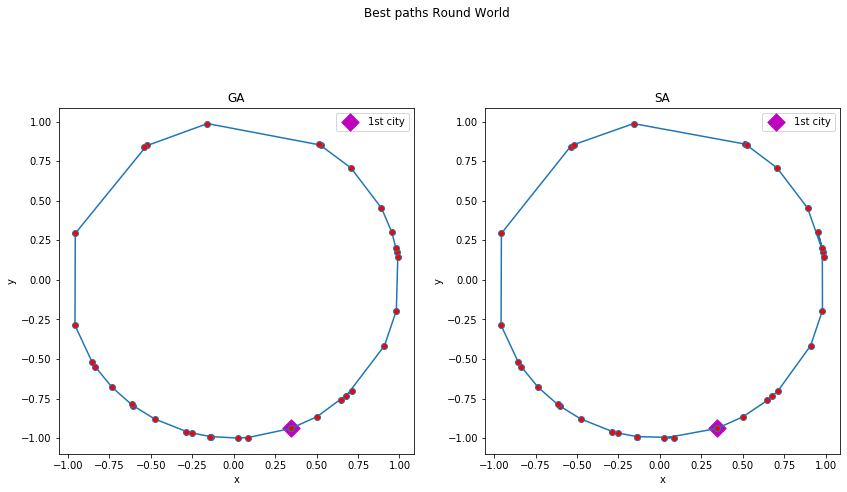

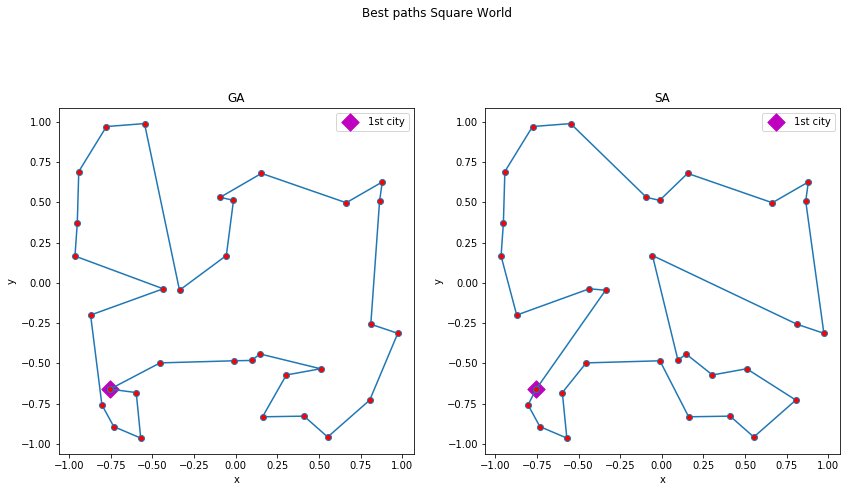

In [4]:
x_round_GA, y_round_GA , x_round_SA, y_round_SA = [], [], [], []
x_square_GA, y_square_GA , x_square_SA, y_square_SA = [], [], [], []

FileImport("../Es10/10.1/config_round_GA.final", x_round_GA, 0)
FileImport("../Es10/10.1/config_round_GA.final", y_round_GA, 1)
FileImport("../Es10/10.1/config_round_SA.final", x_round_SA, 0)
FileImport("../Es10/10.1/config_round_SA.final", y_round_SA, 1)
FileImport("../Es10/10.1/config_square_GA.final", x_square_GA, 0)
FileImport("../Es10/10.1/config_square_GA.final", y_square_GA, 1)
FileImport("../Es10/10.1/config_square_SA.final", x_square_SA, 0)
FileImport("../Es10/10.1/config_square_SA.final", y_square_SA, 1)


fig=plt.figure(figsize=(14,14))
fig.suptitle('Best paths Round World')
plt.subplot(2,2,1)
plt.plot(x_round_GA,y_round_GA, marker='o', markerfacecolor='r')
plt.scatter(x_round_GA[0], y_round_GA[0], s=150, marker='D', color='m', label="1st city")
plt.title("GA")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(x_round_SA,y_round_SA, marker='o', markerfacecolor='r')
plt.scatter(x_round_SA[0], y_round_SA[0], s=150, marker='D', color='m', label="1st city")
plt.title("SA")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

fig=plt.figure(figsize=(14,14))
fig.suptitle('Best paths Square World')
plt.subplot(2,2,1)
plt.plot(x_square_GA,y_square_GA, marker='o', markerfacecolor='r')
plt.scatter(x_square_GA[0], y_square_GA[0], s=150, marker='D', color='m', label="1st city")
plt.title("GA")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(x_square_SA,y_square_SA, marker='o', markerfacecolor='r')
plt.scatter(x_square_SA[0], y_square_SA[0], s=150, marker='D', color='m', label="1st city")
plt.title("SA")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we can see for the Square World the paths are different, this means we have reached at least a local minimum and not a global one.

# <span style="color:red">  Exercise 10.2 </span>

# Parallel GA searches of the optimal path

For this exercise I modified the code explained in Ex.9 to make it work in parallel on 4 cores. In order to do this I used MPI libraries to create 4 *Continents* on which the Genetic Algorithm should work in parallel giving an evolution of the paths on $N_{gen}$ iterations (as in Ex.9). However every $N_{gen}$ the continents exchange their best path randomly and the code iterate this migration $N_{migr}$ times. Below the results for the fitness function of the mean and of the best path and the final configurations for each node.

/home/greta/Scaricati/yes/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


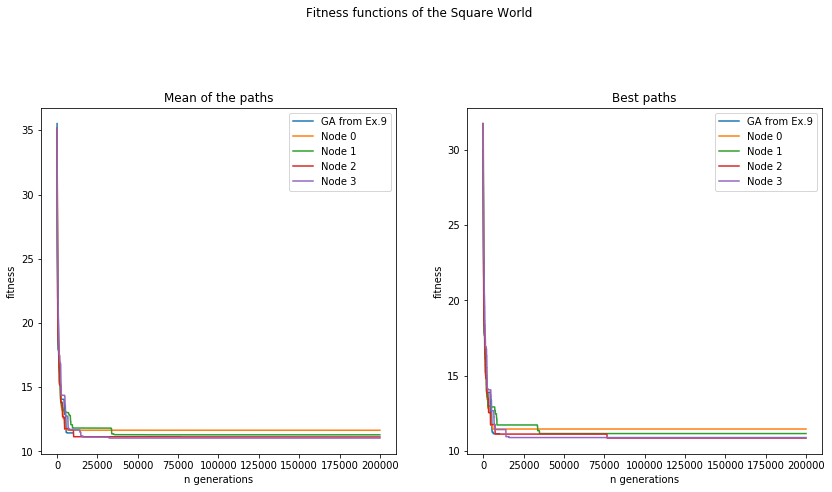

In [5]:
node0_square_fitness_best, node0_square_fitness_mean, node0_square_ngen = [], [], []
node1_square_fitness_best, node1_square_fitness_mean, node1_square_ngen = [], [], []
node2_square_fitness_best, node2_square_fitness_mean, node2_square_ngen = [], [], []
node3_square_fitness_best, node3_square_fitness_mean, node3_square_ngen = [], [], []

square_fitness_best, square_fitness_mean, square_ngen = [], [], []

FileImport("../Es9/fitness_mean_square.out", square_ngen, 0)
FileImport("../Es9/fitness_mean_square.out", square_fitness_mean, 1)
FileImport("../Es9/fitness_mean_square.out", square_fitness_best, 2)

FileImport("../Es10/10.2/Data/Square/node0_fitness_mean.out", node0_square_ngen, 0)
FileImport("../Es10/10.2/Data/Square/node0_fitness_mean.out", node0_square_fitness_mean, 1)
FileImport("../Es10/10.2/Data/Square/node0_fitness_mean.out", node0_square_fitness_best, 2)
FileImport("../Es10/10.2/Data/Square/node1_fitness_mean.out", node1_square_ngen, 0)
FileImport("../Es10/10.2/Data/Square/node1_fitness_mean.out", node1_square_fitness_mean, 1)
FileImport("../Es10/10.2/Data/Square/node1_fitness_mean.out", node1_square_fitness_best, 2)
FileImport("../Es10/10.2/Data/Square/node2_fitness_mean.out", node2_square_ngen, 0)
FileImport("../Es10/10.2/Data/Square/node2_fitness_mean.out", node2_square_fitness_mean, 1)
FileImport("../Es10/10.2/Data/Square/node2_fitness_mean.out", node2_square_fitness_best, 2)
FileImport("../Es10/10.2/Data/Square/node3_fitness_mean.out", node3_square_ngen, 0)
FileImport("../Es10/10.2/Data/Square/node3_fitness_mean.out", node3_square_fitness_mean, 1)
FileImport("../Es10/10.2/Data/Square/node3_fitness_mean.out", node3_square_fitness_best, 2)


fig=plt.figure(figsize=(14,14))
fig.suptitle('Fitness functions of the Square World')
plt.subplot(2,2,1)
plt.plot(square_ngen, square_fitness_mean, label="GA from Ex.9")
plt.plot(node0_square_ngen,node0_square_fitness_mean, label="Node 0")
plt.plot(node1_square_ngen,node1_square_fitness_mean, label="Node 1")
plt.plot(node2_square_ngen,node2_square_fitness_mean, label="Node 2")
plt.plot(node3_square_ngen,node3_square_fitness_mean, label="Node 3")
plt.title("Mean of the paths")
plt.legend()
plt.xlabel('n generations')
plt.ylabel('fitness')

plt.subplot(2,2,2)
plt.plot(square_ngen, square_fitness_best, label="GA from Ex.9")
plt.plot(node0_square_ngen, node0_square_fitness_best, label="Node 0")
plt.plot(node1_square_ngen, node1_square_fitness_best, label="Node 1")
plt.plot(node2_square_ngen, node2_square_fitness_best, label="Node 2")
plt.plot(node3_square_ngen, node3_square_fitness_best, label="Node 3")
plt.title("Best paths")
plt.legend()
plt.xlabel('n generations')
plt.ylabel('fitness')

plt.show()

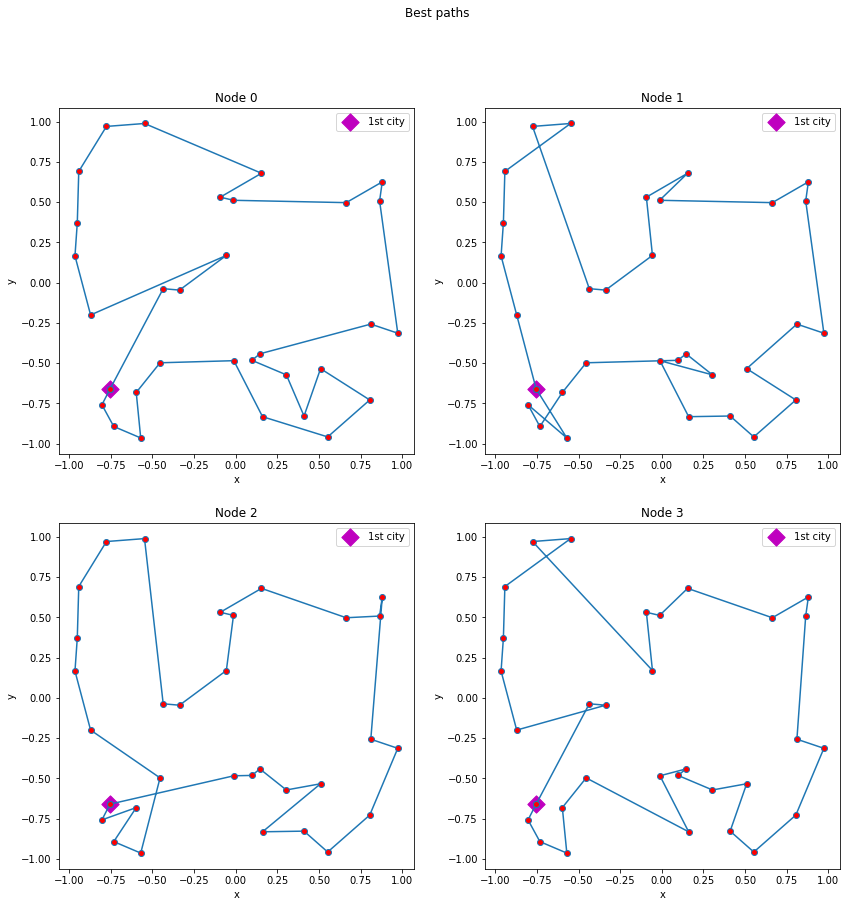

In [3]:
node0_x_square, node0_y_square = [], []
node1_x_square, node1_y_square = [], []
node2_x_square, node2_y_square = [], []
node3_x_square, node3_y_square = [], []

FileImport("../Es10/10.2/Data/Square/node0_config.final", node0_x_square, 0)
FileImport("../Es10/10.2/Data/Square/node0_config.final", node0_y_square, 1)
FileImport("../Es10/10.2/Data/Square/node1_config.final", node1_x_square, 0)
FileImport("../Es10/10.2/Data/Square/node1_config.final", node1_y_square, 1)
FileImport("../Es10/10.2/Data/Square/node2_config.final", node2_x_square, 0)
FileImport("../Es10/10.2/Data/Square/node2_config.final", node2_y_square, 1)
FileImport("../Es10/10.2/Data/Square/node3_config.final", node3_x_square, 0)
FileImport("../Es10/10.2/Data/Square/node3_config.final", node3_y_square, 1)


fig=plt.figure(figsize=(14,14))
fig.suptitle('Best paths')
plt.subplot(2,2,1)
plt.plot(node0_x_square,node0_y_square, marker='o', markerfacecolor='r')
plt.scatter(node0_x_square[0], node0_y_square[0], s=150, marker='D', color='m', label="1st city")
plt.title("Node 0")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(node1_x_square,node1_y_square, marker='o', markerfacecolor='r')
plt.scatter(node1_x_square[0], node1_y_square[0], s=150, marker='D', color='m', label="1st city")
plt.title("Node 1")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,3)
plt.plot(node2_x_square,node2_y_square, marker='o', markerfacecolor='r')
plt.scatter(node2_x_square[0], node2_y_square[0], s=150, marker='D', color='m', label="1st city")
plt.title("Node 2")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,4)
plt.plot(node3_x_square,node3_y_square, marker='o', markerfacecolor='r')
plt.scatter(node3_x_square[0], node3_y_square[0], s=150, marker='D', color='m', label="1st city")
plt.title("Node 3")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

As we can see from the graphs the parallel computing makes the path to converge in each node to a possible minimum for the system, however the minima are not equal to each other. This means that the parallelization works correctly making for each node different paths from different seeds. That also indicates that my code doesn't find a global minimum, but just local ones.